In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')

# print first five data of df.
print(df.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
# now lets take label in variable l.
l = df["label"]

In [4]:
# drop the label feauture and save the pixel feautures in variable d.
d = df.drop('label',axis=1)

In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


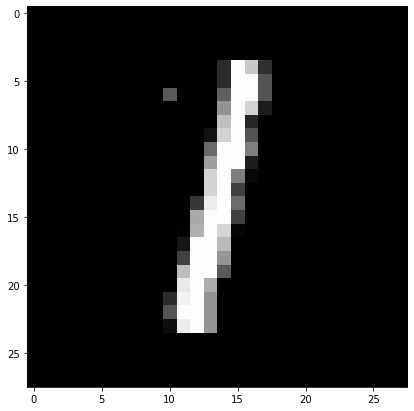

1


In [6]:
# display or plot number.
plt.figure(figsize=(7,7))
inx = 37
grid_data = d.iloc[inx].to_numpy().reshape(28,28)# reshape from 1d to 2d pixel array
plt.imshow(grid_data,interpolation = "none",cmap='gray')
plt.show()

print(l[inx])

# PCA Code Explaination.

pick the first 15k data -points to work on for time-effeciency.



In [7]:
labels = l.head(15000)
data = d.head(15000)
print(f"the shape of sample data:{data.shape}")

the shape of sample data:(15000, 784)


Data Preprocessing: Stanardizing the data.

In [8]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


finding the co-variance matrix which is: A^T * A

In [9]:
sample_data = standardized_data

matrix multiplication using numpy.

In [10]:
covr_matrix = np.matmul(sample_data.T,sample_data)

print(f"the shape of co-variance matrix:{covr_matrix.shape}")

the shape of co-variance matrix:(784, 784)


*  finding the top two eigen-value and  corresponding eigen-vectors.

*  For Projecting onto a 2-Dim Space. 

In [11]:
from scipy.linalg import eigh

* The parameter 'eigvals' is defind (low value to high value)

* eigh function will return the eigen values in asending order.

* This code generates only the top 2(782,783) eigenvalues.

In [12]:
values,vectors = eigh(covr_matrix,eigvals=(782,783))
print(f"shape of eigen vetors: {vectors.shape}")

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print(f"updated shape of eigen vectors: {vectors.shape}")
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

shape of eigen vetors: (784, 2)
updated shape of eigen vectors: (2, 784)


In [13]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
import matplotlib.pyplot as plt
new_cordinates = np.matmul(vectors,sample_data.T)
print(f"resultant new data points shape {vectors.shape} X {sample_data.T.shape} = {new_cordinates.shape}")

resultant new data points shape (2, 784) X (784, 15000) = (2, 15000)


In [14]:
# apppending label to the 2d projected data.

new_cordinates = np.vstack((new_cordinates,labels)).T

In [15]:
# creating new dataframe for ploting labeled points.
dataframe = pd.DataFrame(new_cordinates,columns=('1st Principal','2nd Principal','label'))
print(dataframe.head())

   1st Principal  2nd Principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


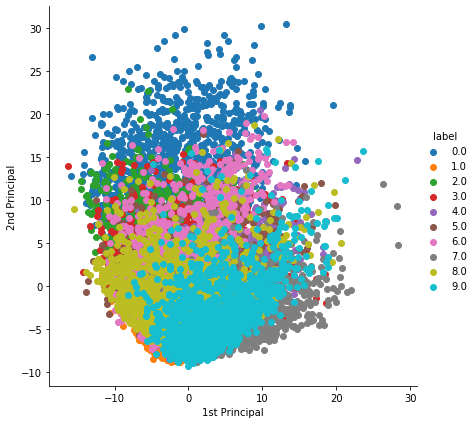

In [16]:
# ploting the 2d datapoints with seaborn.
import seaborn as sns
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'1st Principal','2nd Principal').add_legend()
plt.show()


# PCA using Scikit-Learn

In [17]:
# intializing the pca

from sklearn import decomposition
pca = decomposition.PCA()

In [18]:
# Configuring the parametters.
#the number of components.

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(f'shape of pca reduced shape: {pca_data.shape}')

shape of pca reduced shape: (15000, 2)


In [19]:
# adding label for each data-point.
pca_data = np.vstack((pca_data.T, labels)).T

In [20]:
pca_data.shape

(15000, 3)

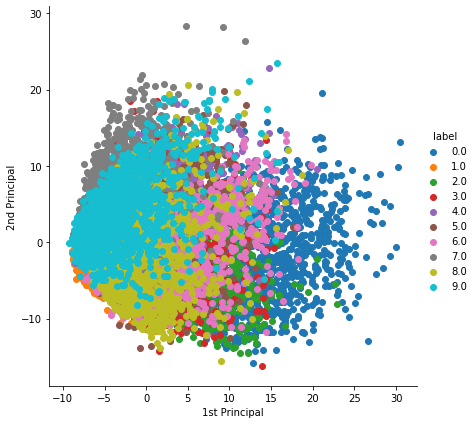

In [21]:
# creating dataframe for ploting datapoints.
pca_df = pd.DataFrame(pca_data,columns=('1st Principal','2nd Principal','label'))
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'1st Principal','2nd Principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

In [22]:
pca = decomposition.PCA()

In [23]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

In [24]:
percantage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)

In [25]:
cum_var_explained = np.cumsum(percantage_var_explained)

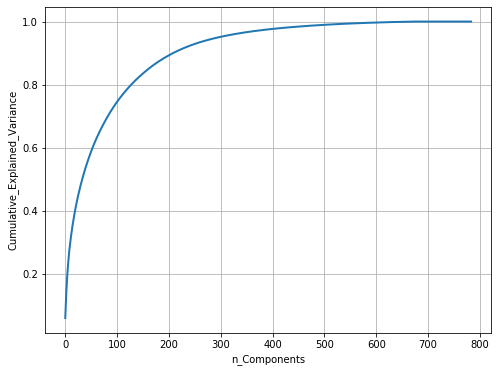

In [26]:
plt.figure(1,figsize=(8,6))
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.xlabel('n_Components')
plt.ylabel('Cumulative_Explained_Variance')
plt.grid()
plt.show()